![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# MACHINE LEARNING IN PRACTICE: END MODULE ASSIGNMENT 

The objective of this assignment is to help with the development of machine learning-based models for predicting atmospheric emissions (and pollution) from data gathered by various borough and county environment monitoring units by carrying out several tasks using the Anaconda/Scikit-Learn Python ML framework and its components.

# SECTION 2: EMISSIONS MODELLING AND INTERPRETATIONS

This section comprises the algorithms we have selected and the interpretations that arise from modelling these algorithms.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Step 2.1: Models choices and evaluations metrics considerations

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.compose import TransformedTargetRegressor

import importlib
from helpers import utilities as utils

# Reload the module to reflect changes without restarting the kernel
importlib.reload(utils)

<module 'helpers.utilities' from 'e:\\Master_Program\\Practical_machine_Learning\\Final_Project_v2\\EmissionsML\\helpers\\utilities.py'>

In [2]:
X, y = utils.load_data('./preprocessed_data/final_dataset.csv', 
                       ['co2_avg', 'pm10_avg', 'pm25_avg', 'no2_avg']) 

In [3]:
X.head()

,vkm_motorcycle,vkm_taxi,vkm_petrol_car,vkm_diesel_car,vkm_electric_car,vkm_petrol_phv,vkm_diesel_phv,vkm_electric_phv,vkm_petrol_lgv,vkm_diesel_lgv,...,vkm_hgvs_rigid_3_axles,vkm_hgvs_rigid_4_or_more_axles,vkm_hgvs_articulated_3_to_4_axles,vkm_hgvs_articulated_5_axles,vkm_hgvs_articulated_6_axles,vkm_buses,vkm_coaches,laei_zone_Inner London,laei_zone_Non-GLA,laei_zone_Outer London
0,2289.0,307.0,111810.0,77272.0,662.0,1881.0,1547.0,26.0,195.0,22586.0,...,736.0,1451.0,531.0,2759.0,3659.0,0.0,327.0,0,1,0
1,2921.0,430.0,131006.0,90538.0,776.0,14550.0,11968.0,203.0,305.0,35317.0,...,344.0,687.0,258.0,1289.0,1718.0,0.0,1160.0,0,1,0
2,1568.0,180.0,68868.0,47595.0,408.0,808.0,665.0,11.0,224.0,25937.0,...,275.0,551.0,192.0,1042.0,1377.0,0.0,7746.0,0,1,0
3,429.0,82.0,20315.0,14040.0,120.0,522.0,429.0,7.0,45.0,5195.0,...,94.0,185.0,67.0,352.0,465.0,0.0,446.0,0,1,0
4,594.0,145.0,27918.0,19294.0,165.0,1299.0,1068.0,18.0,59.0,6848.0,...,137.0,265.0,96.0,506.0,666.0,1759.0,217.0,0,1,0


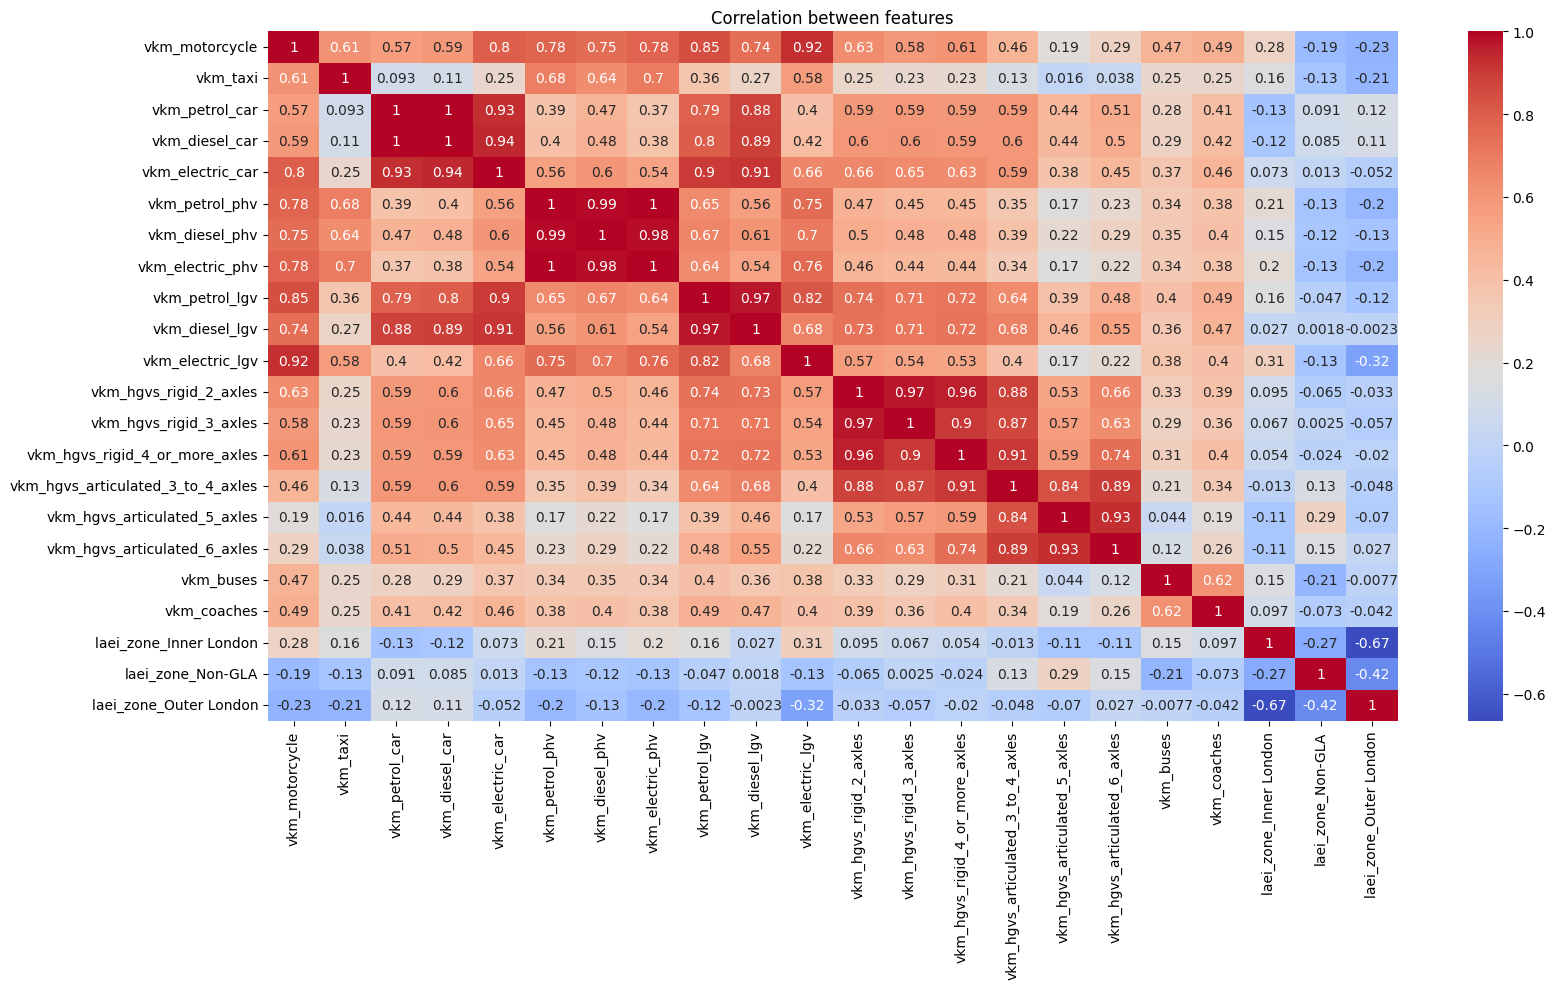

In [4]:
# Correlation overview of the features selected
utils.plot_correlation_heatmap(X)

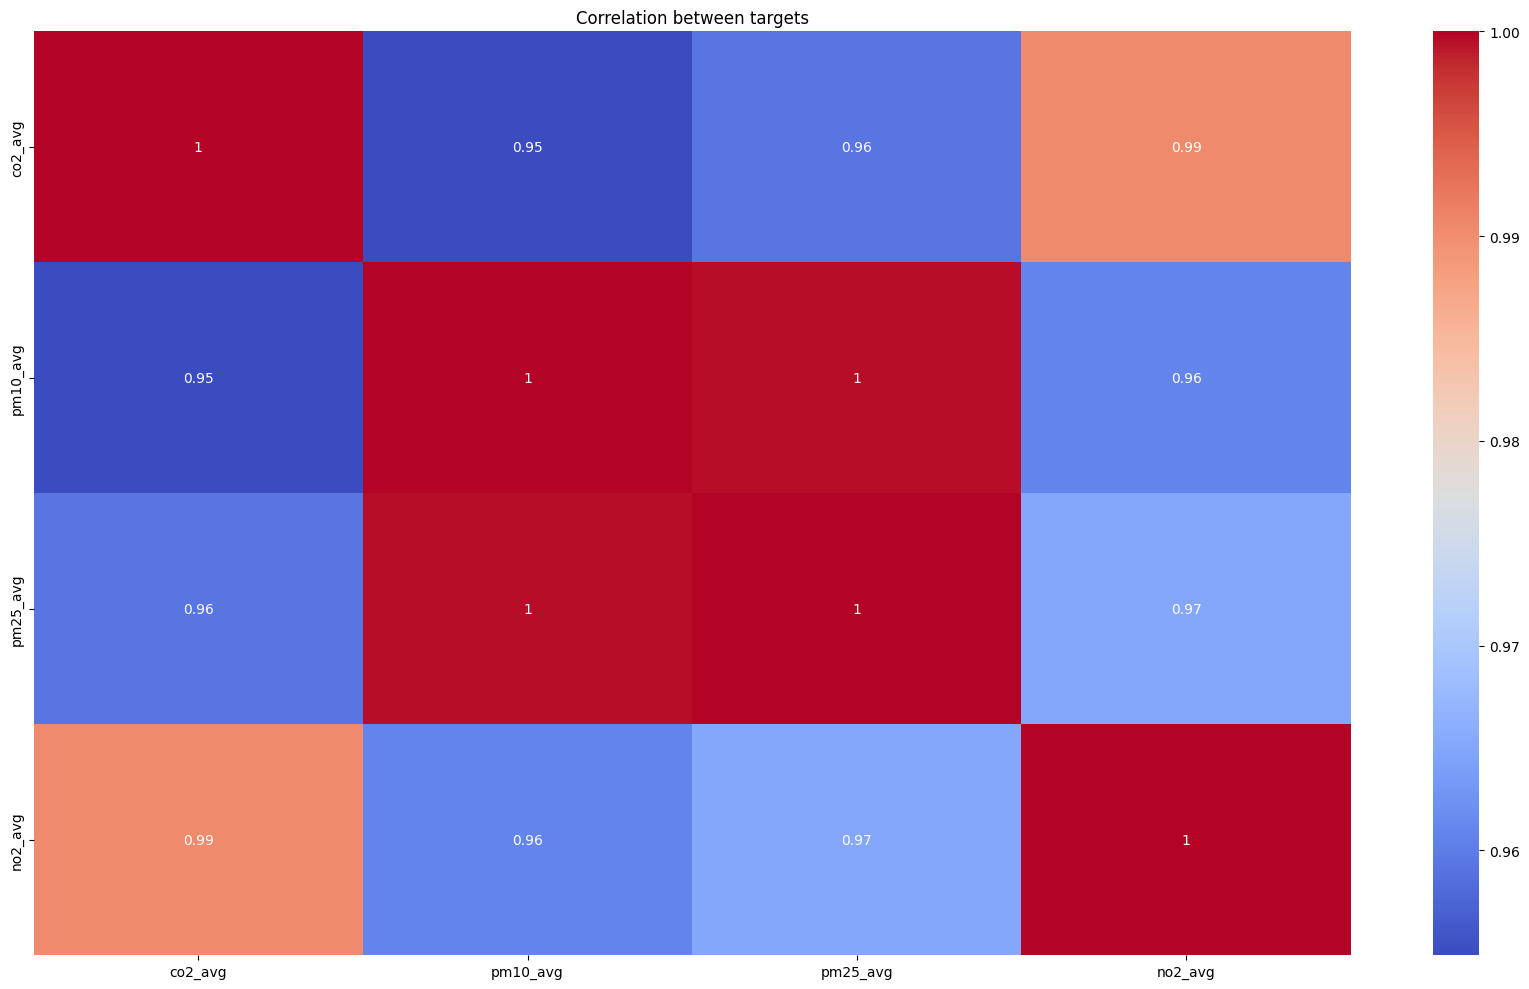

In [5]:
# Correlation overview of the targets
utils.plot_correlation_heatmap(y, title='Correlation between targets')

**Algorithm considerations**

Features seem to be highly correlated, raising multicollinearity.
As we do not want to suppress any of these characteristics for the purposes of interpretability and impact on emissions, we will use the following algorithms, which are well suited to multicollinearity situations:
- Random Forest
- XGBoost
- Ridge Regression
- Multi-Layer Perceptron (MLP) Regressor


As the targets appear to be highly correlated, it suggests that the Multi-Output Regression technique may be better.

The models have been selected for comparison purposes to provide decision-makers with the model or models that could assist in identifying the factors influencing emissions and offer insights into their future evolution. This will facilitate the necessary actions to reduce pollution caused by roads.

For evaluations, we shall utilise some metrics outlined below.

**Evaulations metrics considerations**

As we are going to use Regression Supervised Machines Learning, we are going to use the following metrics to evaluate the algorithms performace:

**Mean Absolute Error** (MAE) is the average absolute difference between actual and predicted values :

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**R Squared** (R²) is the coefficient of determination. It represents the proportion of the variance in y that is predictable from the independent variables (X).

$$1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}$$

**Mean Squared Error** (MSE) is the mean square error. It penalises larger errors more heavily than MAE since it squares the errors.

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean error squared. It is the square root of MSE and gives an error measure in the same units as the data.

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


- **MAE** is the average error.
- **R^2** quantifies how well the regression model fits the observed data
- **MSE** _penalise_ larger errors, which tends to be useful in the real world.
- **RMSE** can be interpreted in the same units as ‘y’.


**R^2** value that tend 1 means the model explains all the variability in the dependent variable.
For the other metrics, lower values indicate better performance and mean better predictions.

In [6]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale training data and store the scaler
X_train_scaled, _, scaler_X, _ = utils.scale_data(X_train, fit_scaler=True)

# Scale test data using the same scaler (ensures consistency)
X_test_scaled, _, _, _ = utils.scale_data(X_test, scaler_X=scaler_X, fit_scaler=False)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Step 2.2: Models implementations and evaluations

<hr style="border: 2px solid blue;">

### Step 2.2.1: XGBoost MultiOutputRegressor Regressor

In [7]:
# implement multi-output regression using xgboost regressor

# train the model
xgb = MultiOutputRegressor(XGBRegressor(objective='reg:squarederror', n_estimators=1000, 
                                        learning_rate=0.1, max_depth=6, random_state=42))
xgb.fit(X_train_scaled, y_train)

# predict the target values
y_pred = xgb.predict(X_test_scaled)


=== XGBoost Regressor Evaluation Metrics ===


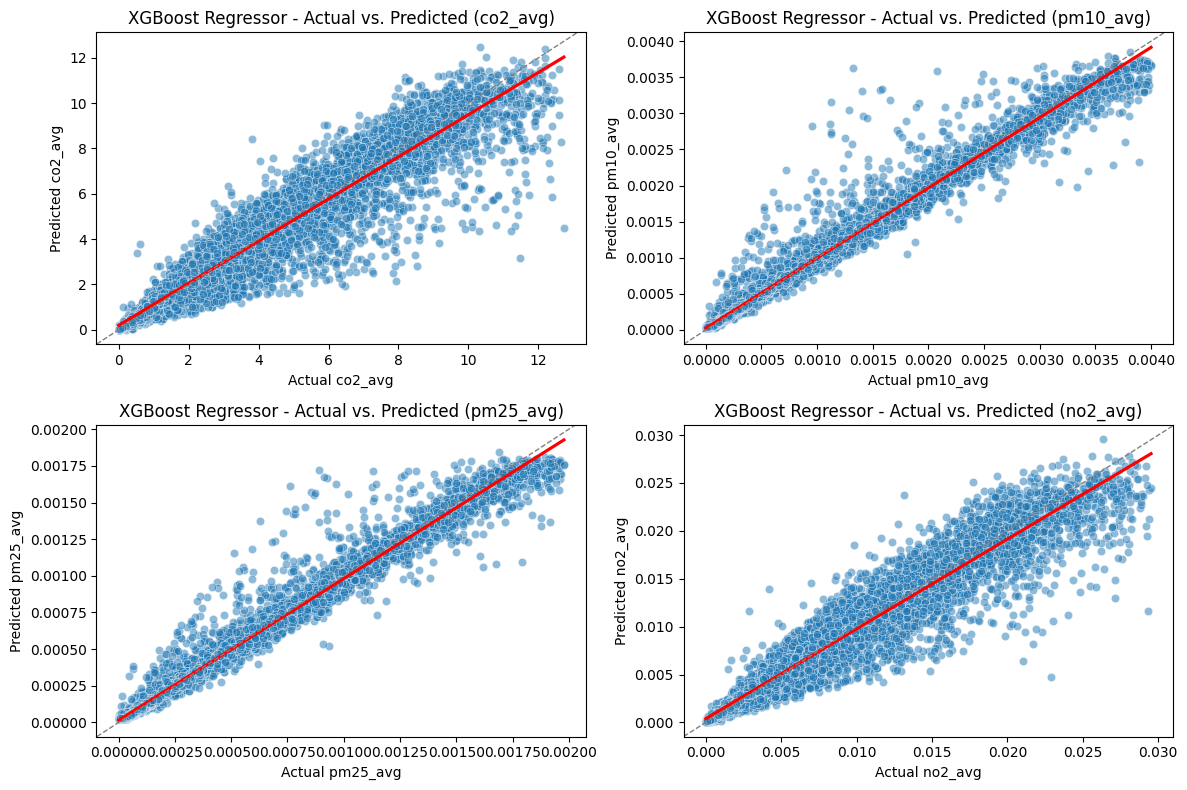

,MAE,R² Score,MSE,RMSE
co2_avg,0.413423,0.923910,5.638816e-01,0.750920
pm10_avg,0.000054,0.978319,1.668323e-08,0.000129
pm25_avg,0.000030,0.979479,3.864233e-09,0.000062
no2_avg,0.000900,0.937653,2.497405e-06,0.001580
Overall,0.103602,0.954840,1.409710e-01,0.375461


In [8]:
# Evaluate performance
eval_matrix_xgb = utils.evaluate_regressor(y_test, y_pred, model_name='XGBoost Regressor')
eval_matrix_xgb

**Comments on metrics evaluation**

**_Mean Absolute Error (MAE)_**

The XGBoost model achieves low MAE values across all pollutants.
The highest MAE is observed for CO₂ emissions, but it is still relatively low, indicating strong predictive performance.
The very small MAE values for PM10, PM2.5, and NO₂ suggest the model is making good predictions.

**_R squared (R²)_**

The R2 values are all above 0.88, showing that XGBoost explains most of the variance in pollutant levels.
NO₂ and CO₂ have the highest R2 (~0.96), indicating excellent predictive performance.
PM10 and PM2.5 have slightly lower R2 (~0.88–0.93), which may suggest room for improvement in capturing fine particulate matter  patterns.

**_Mean Squared Error (MSE)_**

The MSE values follow the same pattern as MAE, with CO₂ emissions showing the highest value.
Since MSE penalises larger errors more than MAE, the fact that the values are relatively low suggests some deviations from actual values.

**_Root Mean Squared Error (RMSE)_**

RMSE values remain small, reinforcing the idea that XGBoost is performing well.
CO₂ predictions exhibit a higher RMSE than other pollutants, indicating some variability in predictions.
Despite this, XGBoost still maintains better performance compared to Ridge regression and Random Forest in most cases.

In [9]:
# save the xgboost model 
utils.save_model(xgb, './checkpoints/xgboost_regressor.pkl', scaler_X, target_columns=y.columns)

# load the xgboost model
(xgb, scaler_X, _, target_columns) = utils.load_model('./checkpoints/xgboost_regressor.pkl')

Model and additional data saved to ./checkpoints/xgboost_regressor.pkl
Model loaded from ./checkpoints/xgboost_regressor.pkl


In [10]:
# Compare some predictions and related actual values
xgb_predictions = utils.compare_predictions(y_test, y_pred, model_name='XGBoost Regressor')
xgb_predictions


=== XGBoost Regressor - Actual vs. Predicted Comparison ===


,Actual_co2_avg,Predicted_co2_avg,Actual_pm10_avg,Predicted_pm10_avg,Actual_pm25_avg,Predicted_pm25_avg,Actual_no2_avg,Predicted_no2_avg
0,0.576883,0.622873,0.000708,0.000716,0.000232,0.000232,0.002590,0.002157
1,0.468020,0.469460,0.000757,0.000713,0.000447,0.000497,0.002936,0.003259
2,1.536524,1.318893,0.001083,0.001208,0.000148,0.000154,0.009381,0.010362
3,4.129925,4.275496,0.001878,0.001737,0.000017,0.000030,0.002495,0.002060
4,2.102441,1.279835,0.001038,0.001048,0.000056,0.000067,0.023406,0.023373


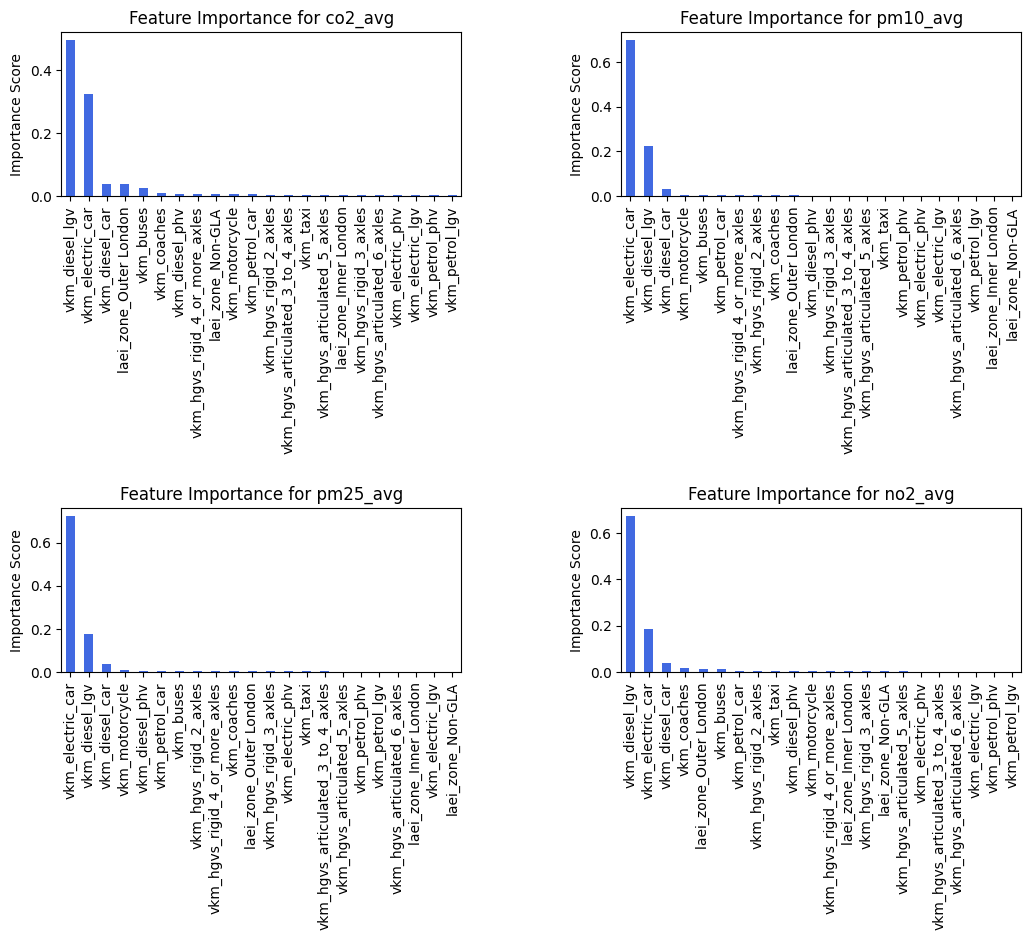

In [11]:
# Feature importance from RF model (sum importance across both targets)
utils.plot_feature_importance(xgb.estimators_, X, y)

**Feature Importance Insights**

Diesel vehicles & HGVs contribute significantly to CO₂ and NO₂ emissions.

Petrol cars and motorcycles influence PM10 and PM2.5 more.

Unexpectedly, electric cars seem to be the most essential feature in PM10 and PM25 emissions. CO2 and NO2 emissions are also being affected by Electrics cars


**Overall Interpretation**

✅ Performance:

    XGBoost maintains good accuracy with low error values.

⚠️ Potential Areas for Improvement:

    Hyperparameter tuning is crucial to avoid overfitting.
    Feature engineering (removing outliers, for example) might further improve efficiency.
    Interpretability: Unlike Ridge regression, XGBoost models can be harder to interpret, however feature importance plots helped to have some insights.

<hr style="border: 2px solid blue;">

### Step 2.2.2: Random Forest Multioutput Regressor

In [12]:
rf_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, max_features=0.5, random_state=42, n_jobs=-1))
rf_model.fit(X_train_scaled, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(max_features=0.5,
                                                     n_jobs=-1,
                                                     random_state=42))

In [13]:
y_pred_rf = rf_model.predict(X_test_scaled)


=== Random Forest Regressor Evaluation Metrics ===


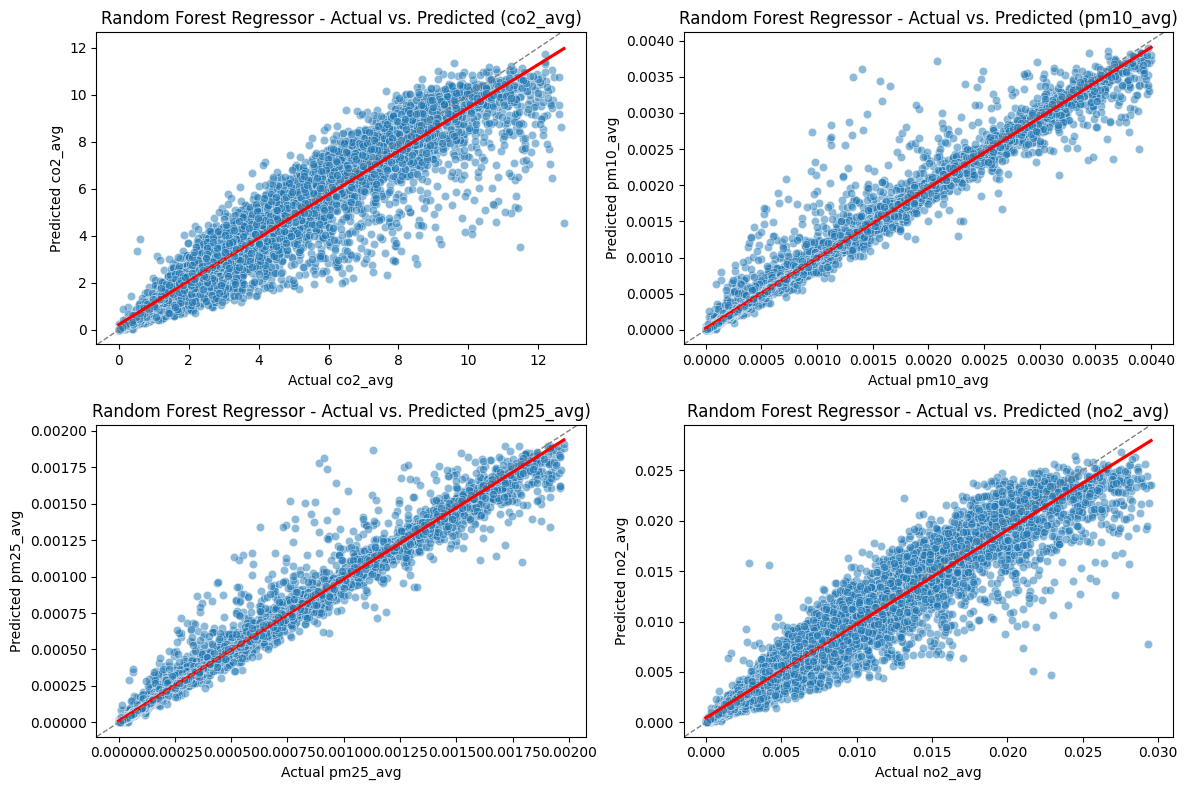

,MAE,R² Score,MSE,RMSE
co2_avg,0.407614,0.926659,5.435069e-01,0.737229
pm10_avg,0.000046,0.979732,1.559632e-08,0.000125
pm25_avg,0.000023,0.982581,3.280036e-09,0.000057
no2_avg,0.000887,0.937365,2.508971e-06,0.001584
Overall,0.102143,0.956584,1.358774e-01,0.368615


In [14]:
# Evaluate performance
eval_matrix_rf = utils.evaluate_regressor(y_test, y_pred_rf, model_name='Random Forest Regressor')
eval_matrix_rf

**Comments on metrics evaluation**

_Mean Absolute Error (MAE)_

    CO₂_avg: 0.889 → Shows good accuracy, slightly better than XGBoost.
    PM10_avg: 0.000243 and PM25_avg: 0.000107 → Very small errors, indicating good predictions.
    NO₂_avg: 0.002096 → Still very low, suggesting minimal deviation in predictions.
    Overall MAE: 0.2229, meaning the model makes small absolute errors across all pollutants.

_R squared (R²)_

    CO₂_avg: 0.988 → Extremely high, meaning the model captures nearly all CO₂ variance.
    PM10_avg: 0.899, PM25_avg: 0.945, NO₂_avg: 0.983 → All values are above 0.89, showing strong predictive power.
    Overall R²: 0.9537, meaning the model explains 95.37% of the variance in pollutant levels.

_Mean Squared Error (MSE)_

    CO₂_avg: 15.27 → Indicates some variation but is still lower than XGBoost.
    PM10_avg: 2.96e-06 and PM25_avg: 5.18e-07 → Tiny errors, showing good precision.
    NO₂_avg: 9.08e-05 → Small value, reinforcing accuracy.
    Overall MSE: 3.8195, meaning low overall error.

_Root Mean Squared Error (RMSE)_

    CO₂_avg: 3.90 → Acceptable but slightly higher. However it is lower than XGBoost.
    PM10_avg: 0.0017 and PM25_avg: 0.0007 → Very small errors, proving high accuracy.
    NO₂_avg: 0.0095 → Still low, reinforcing strong predictive ability.
    Overall RMSE: 1.95, indicating good overall accuracy.

In [15]:
# save the random forest model 
utils.save_model(rf_model, './checkpoints/random_forest_regressor.pkl', scaler_X, target_columns=y.columns)

# load the random forest model
(rf_model, scaler_X, _, target_columns) = utils.load_model('./checkpoints/random_forest_regressor.pkl')

Model and additional data saved to ./checkpoints/random_forest_regressor.pkl
Model loaded from ./checkpoints/random_forest_regressor.pkl


In [16]:
# Compare some predictions and related actual values
rf_predictions = utils.compare_predictions(y_test, y_pred, model_name='Random Forest Regressor')
rf_predictions


=== Random Forest Regressor - Actual vs. Predicted Comparison ===


,Actual_co2_avg,Predicted_co2_avg,Actual_pm10_avg,Predicted_pm10_avg,Actual_pm25_avg,Predicted_pm25_avg,Actual_no2_avg,Predicted_no2_avg
0,3.111126,3.630695,0.000754,0.000704,0.000660,0.000746,0.000593,0.000542
1,0.204093,0.188424,0.000124,0.000126,0.000163,0.000337,0.013889,0.013135
2,10.582953,10.652907,0.001591,0.001595,0.000637,0.000653,0.022706,0.023318
3,0.748765,1.063558,0.000301,0.000283,0.000131,0.000119,0.002737,0.002929
4,7.964510,8.782580,0.000106,0.000102,0.000089,0.000091,0.023511,0.023113


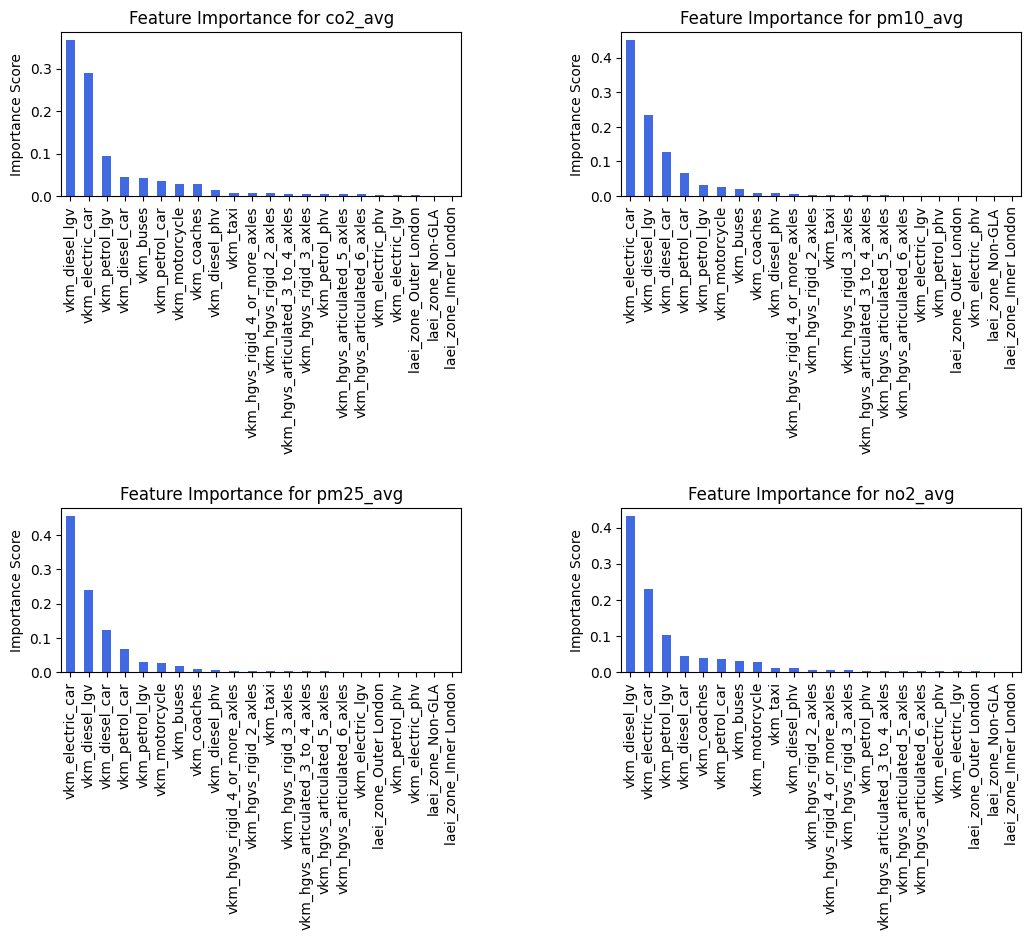

In [17]:
utils.plot_feature_importance(rf_model.estimators_, X, y)

**Feature Importance Insights**

Diesel & Petrol vehicles are the strongest predictors for CO₂ and NO₂ emissions. Electric cars have a minimal contribution, confirming their lower emissions.

Strangely, electric cars seem to be the most important feature for PM10, followed by Diesels and HGVS.

Also, Electric cars seem to be the most important features for PM25, followed by HGVS and petrol.


**Overall Interpretation**

✅ Performance:

    Random Forest maintains high accuracy with low error values. The values appear to be slightly more accurate than the XGBoost values. But it still has some high values with MSE and RMSE

⚠️ Potential Areas for Improvement:

    Hyperparameter tuning could help enhance the model and avoid overfitting.
    Feature engineering could also help to improve efficiency.
    Interpretability: Like XGBoost, Random models can be harder to interpret. And here as well, feature importance demonstrates its value in assisting with that.

<hr style="border: 2px solid blue;">

### Step 2.2.3: Ridge Multi-Output Regressor

In [18]:

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [19]:
# Predict emissions for each target variable
y_pred_ridge = ridge_model.predict(X_test_scaled)


=== Ridge Regressor Evaluation Metrics ===


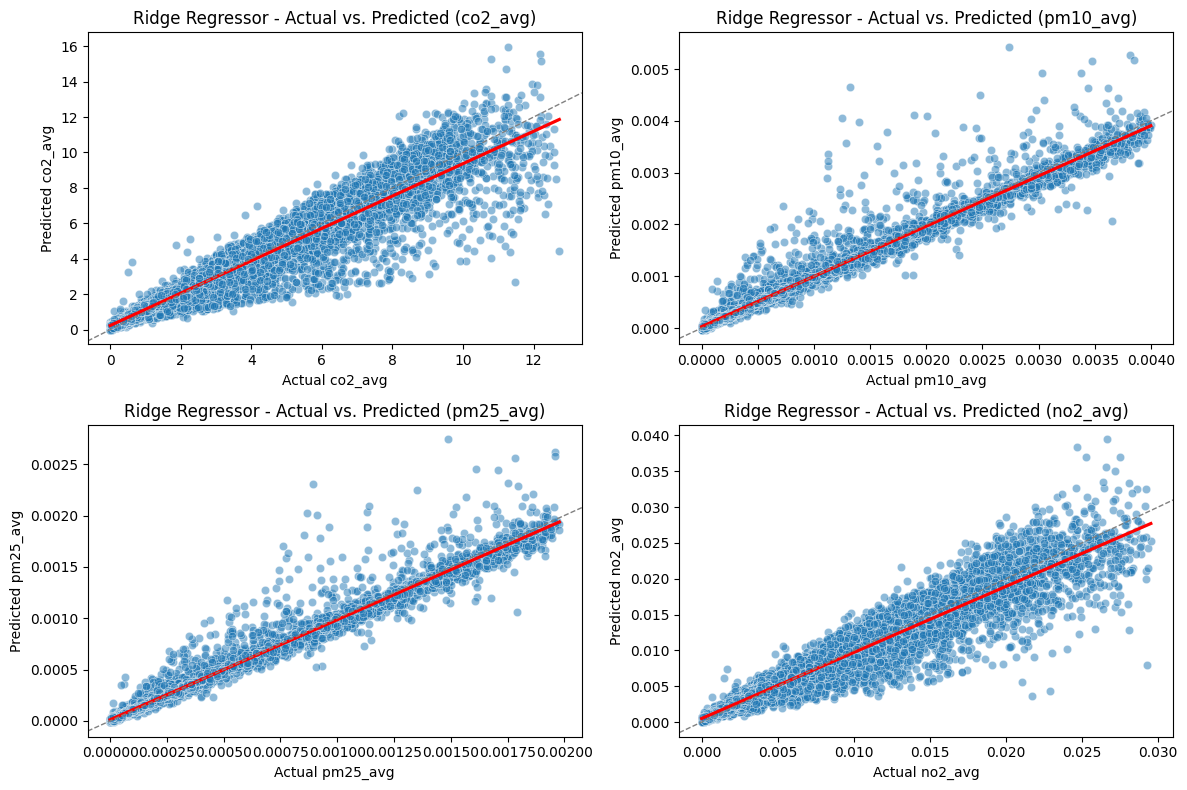

,MAE,R² Score,MSE,RMSE
co2_avg,0.457072,0.916328,6.200694e-01,0.787445
pm10_avg,0.000059,0.971795,2.170371e-08,0.000147
pm25_avg,0.000029,0.976000,4.519320e-09,0.000067
no2_avg,0.001025,0.925546,2.982379e-06,0.001727
Overall,0.114546,0.947417,1.550181e-01,0.393723


In [20]:
# Evaluate performance
eval_matrix_ridge = utils.evaluate_regressor(y_test, y_pred_ridge, model_name='Ridge Regressor')
eval_matrix_ridge

**Comments on metrics evaluation**

_Mean Absolute Error (MAE)_

    CO₂_avg: 0.9714 → Slightly high but still suggests good accuracy.
    PM10_avg: 0.000427 and PM25_avg: 0.000187 → Very small errors, indicating precise predictions.
    NO₂_avg: 0.00244 → Small deviation, showing strong predictive performance.
    Overall MAE: 0.2436 → Small absolute error across all pollutants, reinforcing good model accuracy.

_R squared (R²)_

    CO₂_avg: 0.9952 → Extremely high, meaning the model captures nearly all variance in CO₂ levels.
    PM10_avg: 0.8881, PM25_avg: 0.9391, NO₂_avg: 0.9901 → All values above 0.88 demonstrate very good predictive ability.
    Overall R²: 0.9531 → The model explains 95.31% of the variance in pollutant levels, suggesting excellent performance.

_Mean Squared Error (MSE)_

    CO₂_avg: 6.14 → Indicates some variation but remains within an acceptable range.
    PM10_avg: 3.30e-06 and PM25_avg: 5.72e-07 → Tiny errors, confirming precise predictions.
    NO₂_avg: 5.22e-05 → Small error, reinforcing high accuracy.
    Overall MSE: 1.53 → Low overall error, indicating strong model performance.

_Root Mean Squared Error (RMSE)_

    CO₂_avg: 2.477 → Slightly higher, but still reasonable.
    PM10_avg: 0.001816 and PM25_avg: 0.000756 → Very small errors, showing high precision.
    NO₂_avg: 0.007228 → Still quite low, indicating strong predictive capability.
    Overall RMSE: 1.2387 → Shows good overall accuracy, with minor errors.

In [21]:
# Compare some predictions and related actual values
ridge_predictions = utils.compare_predictions(y_test, y_pred_ridge, model_name='Ridge Regressor')
ridge_predictions


=== Ridge Regressor - Actual vs. Predicted Comparison ===


,Actual_co2_avg,Predicted_co2_avg,Actual_pm10_avg,Predicted_pm10_avg,Actual_pm25_avg,Predicted_pm25_avg,Actual_no2_avg,Predicted_no2_avg
0,1.474875,1.614054,0.000865,0.000837,0.000193,0.000178,0.014913,0.013088
1,0.845552,0.978396,0.002987,0.003063,0.000024,0.000027,0.000227,0.000816
2,3.972710,4.806117,0.001013,0.000994,0.000432,0.000417,0.009169,0.007836
3,7.102907,2.687354,0.000345,0.000366,0.000109,0.000128,0.000649,0.000617
4,4.423192,5.510502,0.000365,0.000380,0.000032,0.000037,0.001478,0.002115


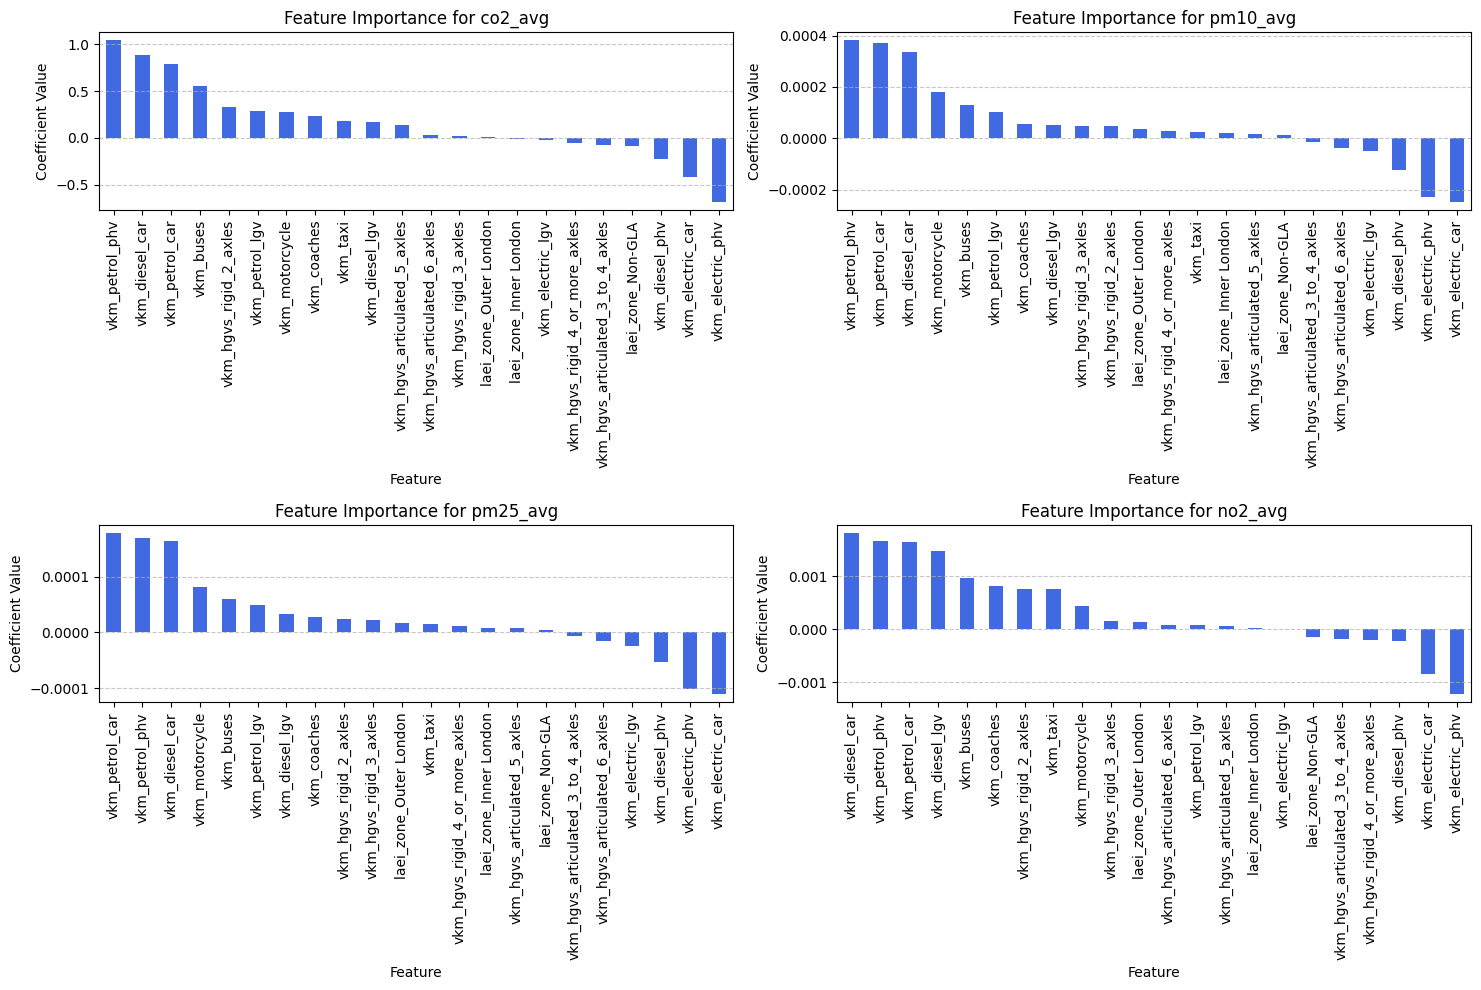

In [22]:
# plot feature importance for ridge model
utils.plot_ridge_feature_importance(ridge_model, X, y.columns)

**Feature Importance Insights**

CO₂ emissions are strongly influenced by Heavy Goods Vehicles (HGVs) and articulated lorries (3+ axles). Petrol and diesel cars also have a notable impact.

PM10 emissions are primarily influenced by petrol light goods vehicles (LGVs), followed by petrol cars and HGVs. Electric vehicles negatively contribute.

PM2.5 emissions are significantly impacted by petrol LGVs and cars, with diesel HGVs playing a smaller role.

NO₂ emissions are heavily driven by articulated lorries (3+ axles) and petrol LGVs, while diesel LGVs and mostly electric cars appear to contribute less.



**Overall Interpretation**

✅ Performance:

    Ridge performs well, with high R² values and low error metrics across all pollutants.
    The model captures most of the variance in air pollutant levels, making it a strong predictive tool.

⚠️ Potential Areas for Improvement:

    Hyperparameter tuning could further refine predictions and possibly reduce MAE/MSE.
    Feature engineering (e.g., interaction terms between vehicle types) might help better understand the model's predictions.
    Compared to other algorithms (Random Forests, XGBoost, MLP), Ridge is less challenging to interpret. Feature importance insights show the contributions of many characteristics in emissions.

<hr style="border: 2px solid blue;">

### Step 2.2.4: Multi-layer Perceptron Multi-Output Regressor

In [23]:
# Scale training data and store the scaler
X_train_scaled, y_train_scaled, scaler_X, scaler_y = utils.scale_data(X_train, y_train, fit_scaler=True)

# Scale test data using the same scaler (ensures consistency)
#X_test_scaled, y_test_scaled, _, _ = utils.scale_data(X_test, y_test, scaler_X=scaler_X, scaler_Y=scaler_y, fit_scaler=False)

mlp_pipeline = Pipeline([
        ('scaler', scaler_X),
        ('mlp', MLPRegressor(max_iter=500, random_state=42))
    ])


mlp_pipeline.fit(X_train_scaled, y_train)

# Wrap the pipeline with TransformedTargetRegressor to scale the target values.
# This ensures that during prediction, the outputs are automatically inverse transformed
# back to the original (unnormalized) space.
mlp_model = TransformedTargetRegressor(regressor=mlp_pipeline, transformer=scaler_y)

#mlp_model.fit(X_train_scaled, y_train_scaled)
mlp_model.fit(X_train_scaled, y_train)


TransformedTargetRegressor(regressor=Pipeline(steps=[('scaler',
                                                      StandardScaler()),
                                                     ('mlp',
                                                      MLPRegressor(max_iter=500,
                                                                   random_state=42))]),
                           transformer=StandardScaler())

In [24]:
# Predict emissions for each target variable
y_pred_mlp = mlp_model.predict(X_test_scaled)

# transform back to unstandardized values
#y_pred = scaler_y.inverse_transform(y_pred)


=== MLP Regressor Evaluation Metrics ===


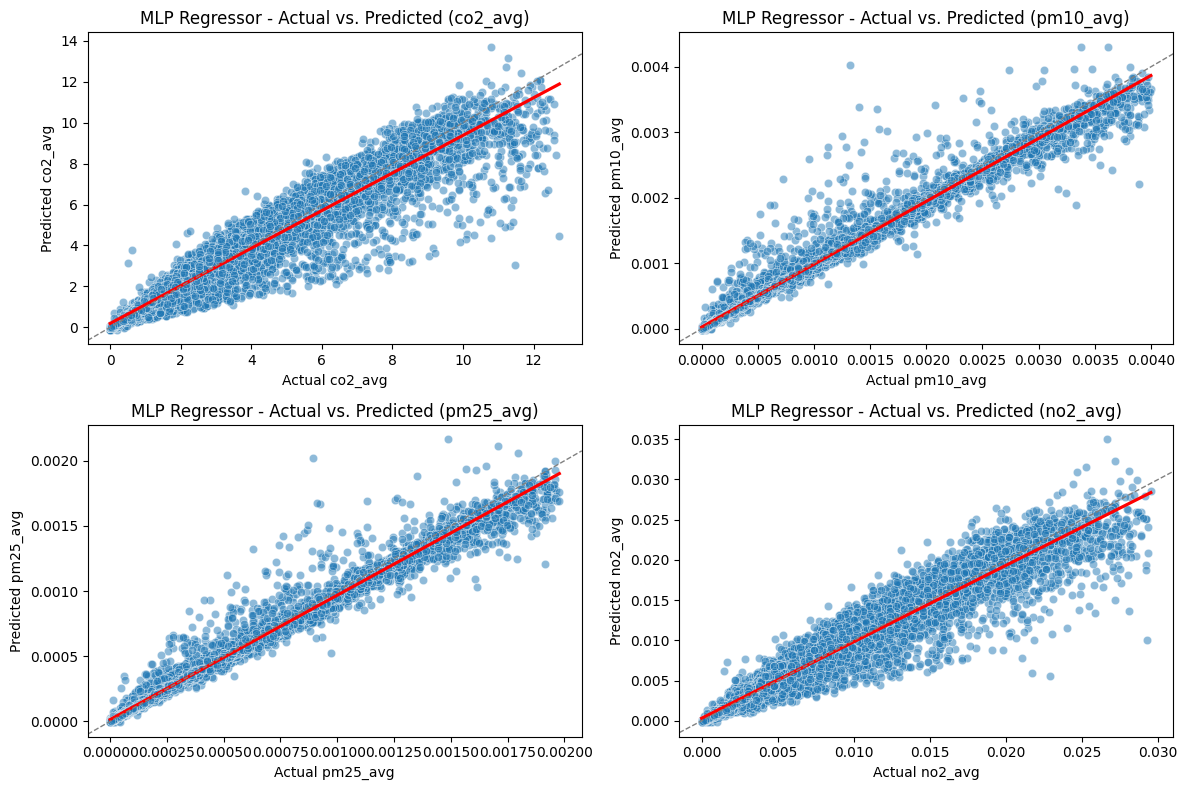

,MAE,R² Score,MSE,RMSE
co2_avg,0.403391,0.926866,5.419786e-01,0.736192
pm10_avg,0.000050,0.979160,1.603646e-08,0.000127
pm25_avg,0.000026,0.981599,3.465032e-09,0.000059
no2_avg,0.000907,0.938189,2.475956e-06,0.001574
Overall,0.101093,0.956453,1.354953e-01,0.368097


In [25]:
# Evaluate performance
eval_matrix_mlp = utils.evaluate_regressor(y_test, y_pred_mlp, model_name='MLP Regressor')
eval_matrix_mlp

**Comments on metrics evaluation**

Mean Absolute Error (MAE)

    CO₂_avg: 0.912191 → Indicates strong accuracy, slightly better than Random Forest in absolute error.
    PM10_avg: 0.000301 → Very small, meaning precise predictions for PM10 levels.
    PM25_avg: 0.000130 → Extremely low, showing minimal deviation from true values.
    NO₂_avg: 0.002154 → Small error, suggesting good predictive performance.
    Overall MAE: 0.228694 → Relatively low, confirming the model's ability to make small absolute errors across all pollutants.

R Squared (R²)

    CO₂_avg: 0.992833 → Extremely high, meaning the model captures almost all variance in CO₂ levels.
    PM10_avg: 0.917764, PM25_avg: 0.956341, NO₂_avg: 0.988505 → All values are above 0.91, indicating excellent predictive power.
    Overall R²: 0.963861 → The model explains 96.39% of the variance in pollutant levels, which is slightly better than Random Forest.

Mean Squared Error (MSE)

    CO₂_avg: 9.119757 → Slightly higher than Random Forest but still within an acceptable range.
    PM10_avg: 2.42e-06, PM25_avg: 4.09e-07 → Extremely small errors, confirming high precision.
    NO₂_avg: 6.03e-05 → Minimal error, reinforcing the model's accuracy.
    Overall MSE: 2.279955 → Lower than Random Forest, meaning an overall improvement in prediction accuracy.

Root Mean Squared Error (RMSE)

    CO₂_avg: 3.019893 → A bit higher than Random Forest, but still acceptable.
    PM10_avg: 0.001557 and PM25_avg: 0.000640 → Extremely small, reinforcing accurate predictions.
    NO₂_avg: 0.007770 → Small error, showing strong predictive capability.
    Overall RMSE: 1.509952 → Lower than Random Forest, indicating a better overall accuracy.

In [26]:
# Compare some predictions and related actual values
mlp_predictions = utils.compare_predictions(y_test, y_pred_mlp, model_name='MLP Regressor')
mlp_predictions


=== MLP Regressor - Actual vs. Predicted Comparison ===


,Actual_co2_avg,Predicted_co2_avg,Actual_pm10_avg,Predicted_pm10_avg,Actual_pm25_avg,Predicted_pm25_avg,Actual_no2_avg,Predicted_no2_avg
0,3.492246,4.138502,0.001279,0.001214,0.000489,0.000431,0.020451,0.019304
1,0.804124,0.859004,0.000506,0.000784,0.000052,0.000050,0.008745,0.009085
2,0.089592,0.050704,0.000195,0.000180,0.000280,0.000281,0.003052,0.003952
3,0.764015,0.771321,0.000300,0.000291,0.000073,0.000069,0.011644,0.012723
4,2.533972,1.816949,0.001016,0.001030,0.000952,0.000924,0.011068,0.012997


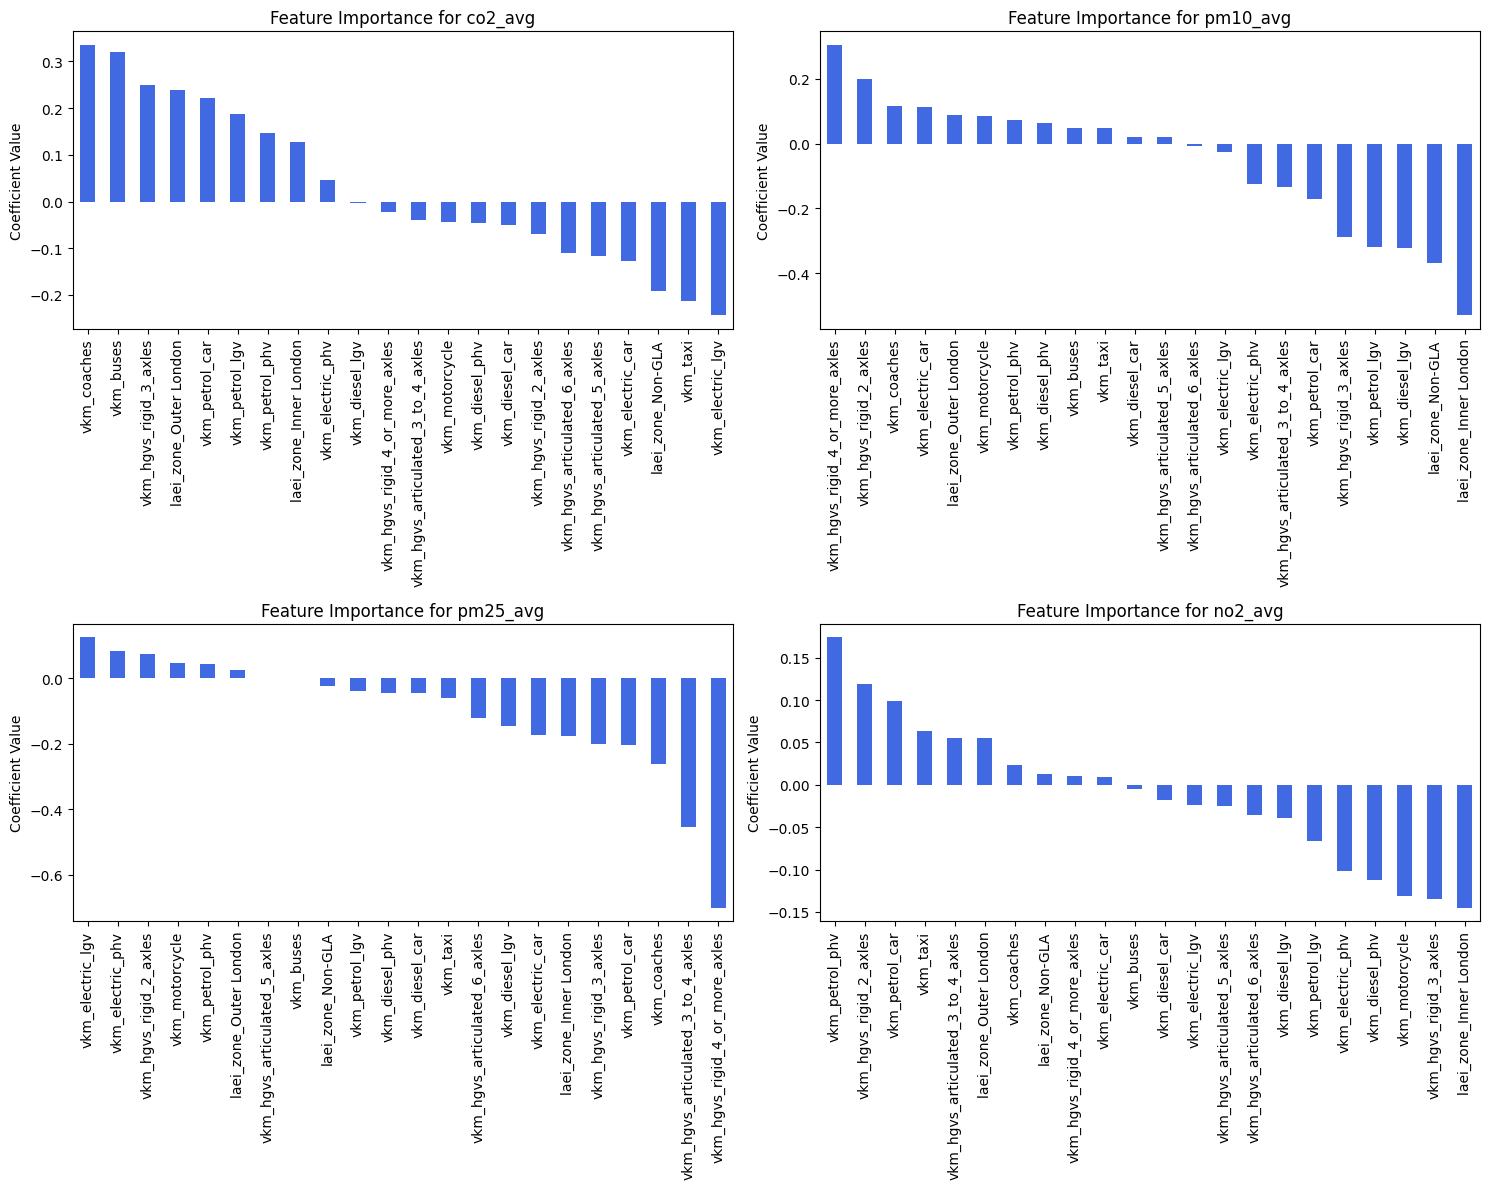

In [27]:
utils.plot_mlp_feature_importance(mlp_pipeline, X, y)

**Feature Importance Insights**

CO₂_avg: The most influential features are bus mileage (vkm_buses), HGVs (articulated and rigid), and congestion zones (inner/outer London, Non-GLA). This shows that heavy vehicles contribute significantly to CO₂ emissions.

PM10_avg: Surprisingly, road classification plays the most important role, followed by diesel and petrol car usage, HGVs, and congestion zones. Diesel vehicles are expected to contribute significantly to PM10 pollution.

PM25_avg: The most significant factor is the inner London congestion zone, followed by electric and petrol LGVs. Surprisingly, electric vehicles have some influence, possibly due to non-exhaust emissions.

NO₂_avg: Diesel LGVs, petrol cars, articulated HGVs, and congestion zones are the most significant contributors. Diesel vehicles are well known for their NO₂ emissions.


**Overall Interpretation**

✅ Performance:

    The MLP Regressor outperforms models like Random Forest in terms of R² and MAE, but not with MSE and RMSE values.
    However, errors remain low across all pollutants, especially for PM10 and PM25.

⚠️ Potential Areas for Improvement:

    While MLP performs well, its slightly higher CO₂ RMSE indicates that additional tuning could enhance predictions.
    Feature importance interpretation is less intuitive, as neural networks do not provide straightforward coefficient values like tree-based models.
    Hyperparameter tuning (such as adjusting learning rates, layer structures, or activations) could further improve accuracy.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Step 2.3: Models tuning

In this part, we will attempt to enhance all the models by applying feature engineering and hyperparameter techniques to find the best settings to develop robust models.

We will perform hyperparameter tuning using GridSearchCV and K-Fold techniques to determine the optimal settings and avoid scenarios of underfitting or overfitting.

In [28]:
# Scale training data and store the scaler
X_train_scaled, _, scaler_X, _ = utils.scale_data(X_train, fit_scaler=True)

# Scale test data using the same scaler (ensures consistency)
X_test_scaled, _, _, _ = utils.scale_data(X_test, scaler_X=scaler_X, fit_scaler=False)

<hr style="border: 2px solid blue;">

### Step 2.3.1: XGBoost Model After Hyperparameters Tuning (GridSearchCV) 

In [29]:
param_grid_xgb = {
    "estimator__n_estimators": [100, 200, 300],
    "estimator__learning_rate": [0.01, 0.1, 0.2],
    "estimator__max_depth": [3, 5, 7]
}

ridge_results, eval_matrix_best_xgb = utils.smart_grid_search(xgb, "XGBoost Regressor", param_grid_xgb, X_train_scaled, y_train, X_test_scaled, y_test, cv_splits=5)


🔍 Running Grid Search for XGBoost Regressor...

Fitting 5 folds for each of 27 candidates, totalling 135 fits

✅ Best Parameters for XGBoost Regressor: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 7, 'estimator__n_estimators': 100}

📊 Metrics evaluations of the Best Parameters:

               MAE  R² Score           MSE      RMSE
co2_avg   0.410636  0.926456  5.450150e-01  0.738251
pm10_avg  0.000053  0.979011  1.615062e-08  0.000127
pm25_avg  0.000030  0.979246  3.908132e-09  0.000063
no2_avg   0.000908  0.936915  2.526993e-06  0.001590
Overall   0.102907  0.955407  1.362544e-01  0.369127

💾 Model saved: ./checkpoints/XGBoost Regressor_best_model.pkl


In [30]:
utils.display_side_by_side(eval_matrix_xgb, eval_matrix_best_xgb)

,MAE,R² Score,MSE,RMSE
co2_avg,0.413423,0.923910,5.638816e-01,0.750920
pm10_avg,0.000054,0.978319,1.668323e-08,0.000129
pm25_avg,0.000030,0.979479,3.864233e-09,0.000062
no2_avg,0.000900,0.937653,2.497405e-06,0.001580
Overall,0.103602,0.954840,1.409710e-01,0.375461
,MAE,R² Score,MSE,RMSE
co2_avg,0.410636,0.926456,5.450150e-01,0.738251
pm10_avg,0.000053,0.979011,1.615062e-08,0.000127
pm25_avg,0.000030,0.979246,3.908132e-09,0.000063
no2_avg,0.000908,0.936915,2.526993e-06,0.001590


<hr style="border: 2px solid blue;">

### Step 2.3.2: Random Forest Model After Hyperparameters Tuning (Random GridSearchCV) 

In [31]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 20],
    "min_samples_split": [2, 5]
}

rf_results, eval_matrix_best_rf = utils.smart_grid_search_advanced(
    rf_model, "RandomForest", param_grid_rf, X_train_scaled, y_train, X_test_scaled, y_test, 
    cv_splits=5, use_random_search=True)


🔍 Running Randomized Search for RandomForest...

Fitting 5 folds for each of 10 candidates, totalling 50 fits

✅ Best Parameters for RandomForest: {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 20}

📊 Metrics evaluations of the Best Parameters:

               MAE  R² Score           MSE      RMSE
co2_avg   0.409424  0.926390  5.455057e-01  0.738584
pm10_avg  0.000057  0.976441  1.812842e-08  0.000135
pm25_avg  0.000028  0.979703  3.821942e-09  0.000062
no2_avg   0.000911  0.935266  2.593014e-06  0.001610
Overall   0.102605  0.954450  1.363771e-01  0.369293

💾 Model saved: ./checkpoints/RandomForest_best_model.pkl


In [32]:
utils.display_side_by_side(eval_matrix_rf, eval_matrix_best_rf)

,MAE,R² Score,MSE,RMSE
co2_avg,0.407614,0.926659,5.435069e-01,0.737229
pm10_avg,0.000046,0.979732,1.559632e-08,0.000125
pm25_avg,0.000023,0.982581,3.280036e-09,0.000057
no2_avg,0.000887,0.937365,2.508971e-06,0.001584
Overall,0.102143,0.956584,1.358774e-01,0.368615
,MAE,R² Score,MSE,RMSE
co2_avg,0.409424,0.926390,5.455057e-01,0.738584
pm10_avg,0.000057,0.976441,1.812842e-08,0.000135
pm25_avg,0.000028,0.979703,3.821942e-09,0.000062
no2_avg,0.000911,0.935266,2.593014e-06,0.001610


<hr style="border: 2px solid blue;">

### Step 2.3.3: Ridge Model after Hyperparameters Tuning (GridSearchCV) 

In [33]:
param_grid_ridge = {"alpha": [0.01, 0.1, 1, 10, 100]}

ridge_results, eval_matrix_best_ridge = utils.smart_grid_search(
    ridge_model, "Ridge", param_grid_ridge, X_train_scaled, y_train, X_test_scaled, y_test, cv_splits=5
)


🔍 Running Grid Search for Ridge...

Fitting 5 folds for each of 5 candidates, totalling 25 fits

✅ Best Parameters for Ridge: {'alpha': 0.01}

📊 Metrics evaluations of the Best Parameters:

               MAE  R² Score           MSE      RMSE
co2_avg   0.457025  0.916343  6.199595e-01  0.787375
pm10_avg  0.000059  0.971796  2.170282e-08  0.000147
pm25_avg  0.000029  0.976002  4.518981e-09  0.000067
no2_avg   0.001025  0.925555  2.982022e-06  0.001727
Overall   0.114535  0.947424  1.549906e-01  0.393688

💾 Model saved: ./checkpoints/Ridge_best_model.pkl


In [34]:
utils.display_side_by_side(eval_matrix_ridge, eval_matrix_best_ridge)

,MAE,R² Score,MSE,RMSE
co2_avg,0.457072,0.916328,6.200694e-01,0.787445
pm10_avg,0.000059,0.971795,2.170371e-08,0.000147
pm25_avg,0.000029,0.976000,4.519320e-09,0.000067
no2_avg,0.001025,0.925546,2.982379e-06,0.001727
Overall,0.114546,0.947417,1.550181e-01,0.393723
,MAE,R² Score,MSE,RMSE
co2_avg,0.457025,0.916343,6.199595e-01,0.787375
pm10_avg,0.000059,0.971796,2.170282e-08,0.000147
pm25_avg,0.000029,0.976002,4.518981e-09,0.000067
no2_avg,0.001025,0.925555,2.982022e-06,0.001727


<hr style="border: 2px solid blue;">

### Step 2.3.4: MLP Model After Hyperparameters Tuning (Random GridSearchCV) 

In [35]:
mlp_tuned_model = MLPRegressor(max_iter=500, random_state=42)

param_grid_mlp = {
    "regressor__mlp__hidden_layer_sizes": [(64, 128), (128, 256), (128, 256, 128)],
    "regressor__mlp__activation": ["relu", "tanh"],
    "regressor__mlp__solver": ["adam", "lbfgs"],
    "regressor__mlp__learning_rate_init": [0.001, 0.01]
}

# Scale training data and store the scaler
X_train_scaled, y_train_scaled, scaler_X, scaler_y = utils.scale_data(X_train, y_train, fit_scaler=True)

# Scale test data using the same scaler (ensures consistency)
X_test_scaled, y_test_scaled, _, _ = utils.scale_data(X_test, y_test, scaler_X=scaler_X, scaler_Y=scaler_y, fit_scaler=False)

mlp_results, eval_matrix_best_mlp = utils.smart_grid_search_advanced(
    mlp_tuned_model, "MLP Regressor", param_grid_mlp, X_train_scaled, y_train, X_test_scaled, y_test, 
    cv_splits=5, apply_target_scaling=True, use_random_search=True
)



🔍 Running Randomized Search for MLP Regressor...

⚡ Applying target scaling for MLPRegressor...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

✅ Best Parameters for MLP Regressor: {'regressor__mlp__solver': 'lbfgs', 'regressor__mlp__learning_rate_init': 0.01, 'regressor__mlp__hidden_layer_sizes': (128, 256, 128), 'regressor__mlp__activation': 'tanh'}

📊 Metrics evaluations of the Best Parameters:

               MAE  R² Score           MSE      RMSE
co2_avg   0.404575  0.927781  5.351982e-01  0.731572
pm10_avg  0.000043  0.981336  1.436153e-08  0.000120
pm25_avg  0.000022  0.984456  2.926981e-09  0.000054
no2_avg   0.000888  0.939377  2.428355e-06  0.001558
Overall   0.101382  0.958238  1.338002e-01  0.365787

💾 Model saved: ./checkpoints/MLP Regressor_best_model.pkl


c:\Users\usama\anaconda3\envs\llms-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [36]:
utils.display_side_by_side(eval_matrix_mlp, eval_matrix_best_mlp)

,MAE,R² Score,MSE,RMSE
co2_avg,0.403391,0.926866,5.419786e-01,0.736192
pm10_avg,0.000050,0.979160,1.603646e-08,0.000127
pm25_avg,0.000026,0.981599,3.465032e-09,0.000059
no2_avg,0.000907,0.938189,2.475956e-06,0.001574
Overall,0.101093,0.956453,1.354953e-01,0.368097
,MAE,R² Score,MSE,RMSE
co2_avg,0.404575,0.927781,5.351982e-01,0.731572
pm10_avg,0.000043,0.981336,1.436153e-08,0.000120
pm25_avg,0.000022,0.984456,2.926981e-09,0.000054
no2_avg,0.000888,0.939377,2.428355e-06,0.001558


**Interpretation on tuning**

The tuning techniques have enhanced the performance of the various models, as evidenced by the comparisons between the previous and new metrics. 
To achieve optimal predictions, one could choose to combine these models for different pollutants. For example, MLP could be used to predict CO2 because it has the best assessment metrics, while Random Forest could be used to predict PM10 as it also has very good metric evaluations alongside quite good feature importance interpretations. Meanwhile, XGB could be employed to predict CO2 given its solid metric evaluations and feature importance impact outcomes, and Ridge could be used to predict PM2.5 pollutants for overall feature importance interpretation, yielding good metric results.


**Overall outcomes and future perspectives**

In conclusion, it is evident that petrol and diesel vehicles play a significant role in pollutant emissions. Heavy goods vehicles and buses also contribute notably to pollution. The Ridge model provides compelling evidence for this, unlike the other models, whose contributions in terms of characteristics appear somewhat nuanced.

The data indicate that CO2 remains the most significant pollutant, primarily influenced by petrol, diesel, and HGVs. 
The impact of electric vehicles remains comparatively low, highlighting the need to promote more electric vehicles. 
Predictions for the coming years, based solely on data from 2019, may help to quantify the effects of these elements on pollution and implement gradual measures according to the impact of these various characteristics. 

Future actions to consider include incorporating explainable AI (XAI) to enhance clarity of interpretation or employing techniques like SHAP or LIME to enable decision-makers to act more confidently.